#### Business understanding
--------------------------------

### Data understanding
    
This dataset contains the locations of customers. The dataset has the following columns:  
   - ***clientid*** : The unique identifier for the customer
   - ***x*** : The x coordinate of the customer's location, when plotted into a 2D plane
   - ***y*** : The y coordinate of the customer's location, when plotted into a 2D plane

The dataset has 5936 rows of data and has no missing values or outliers.

In [85]:
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering
import matplotlib.pyplot as plt

# read dataframe from local file
df = pd.read_csv('data/drone_cust_locations.csv', sep=';')
df 

,clientid,x,y
0,1,622.771572,164.857623
1,2,416.357298,630.193634
2,3,292.735020,567.333231
3,4,737.211288,166.225676
4,5,540.475375,682.912298
...,...,...,...
5951,5952,832.857394,616.861410
5952,5953,242.734500,490.325092
5953,5954,108.690847,758.833921
5954,5955,803.251074,430.740623


### Data preparation
Since id is not a useful feature for clustering, we will drop it. a 

In [86]:
df.drop('clientid', axis=1, inplace=True)
df

,x,y
0,622.771572,164.857623
1,416.357298,630.193634
2,292.735020,567.333231
3,737.211288,166.225676
4,540.475375,682.912298
...,...,...
5951,832.857394,616.861410
5952,242.734500,490.325092
5953,108.690847,758.833921
5954,803.251074,430.740623


we plot the data so we can see visually how the customers are located in the 2D plane.
we can see from the data that it contains somekind of unoccupied zone in the middle.
also the customers are not evenly distributed in the plane. specifically the customers are more concentrated in the bottom rightcorner of the plane. This uneven distribution may impact clustering performance.

<Axes: xlabel='x', ylabel='y'>

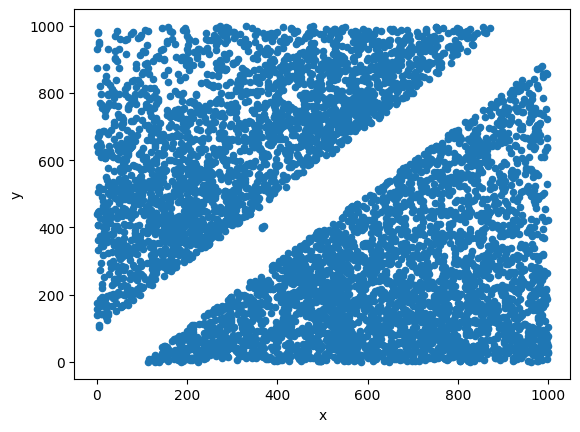

In [87]:
df.plot.scatter(x='x', y='y')
# Miten tän tulkitsee? Keskellä on tie/joki/metsä/pelto ??

## Modelling
First, we used the ***WCSS (Within-Cluster Sum of Squares)*** method to determine the optimal number of clusters. Based on the elbow method, the most suitable choice appeared to be ***3 clusters***. To further evaluate the quality, we calculated the silhouette score, which resulted in 0.45, indicating moderate clustering accuracy with some overlap between clusters.

##### Calculate WCSS

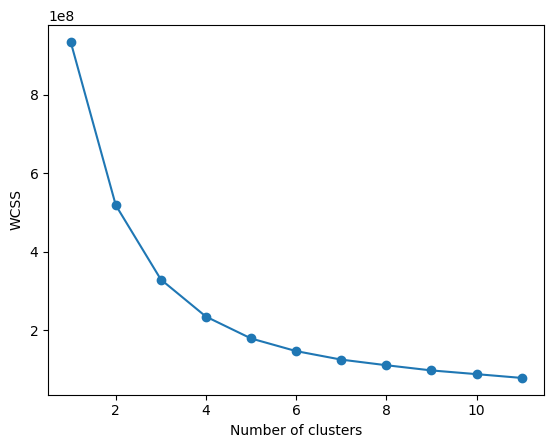

In [88]:
# "Kyynärpää" ~5 klusterin kohdalla
wcss = []
for i in range(1,12):
    model = KMeans(init='random', n_clusters=i, random_state=42).fit(df)
    wcss.append(model.inertia_)
    
plt.plot(list(range(1,12)), wcss, 'o-')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

##### calculate silhouette score

In [89]:
from sklearn.metrics import silhouette_score
numnber_of_depots = 3
model = KMeans(init='random', n_clusters=numnber_of_depots, random_state=42).fit(df)
labels = model.labels_
print('Silhouette score = %.2f' % silhouette_score(df, labels))

Silhouette score = 0.42


Attach the information on the closest depot to each client in the dataframe.

In [90]:
labels = model.fit_predict(df)
cluster_locations = model.cluster_centers_
df["Depot"] = labels + 1
print(df.head(10))
df["Depot"].value_counts()

            x           y  Depot
0  622.771572  164.857623      1
1  416.357298  630.193634      3
2  292.735020  567.333231      2
3  737.211288  166.225676      1
4  540.475375  682.912298      3
5  535.469492  318.439661      1
6  640.380050  870.833221      3
7  235.772075  359.048203      2
8  481.896884  661.491838      3
9  730.032789  312.177817      1


Depot
1    2488
2    1762
3    1706
Name: count, dtype: int64

### Evaluation

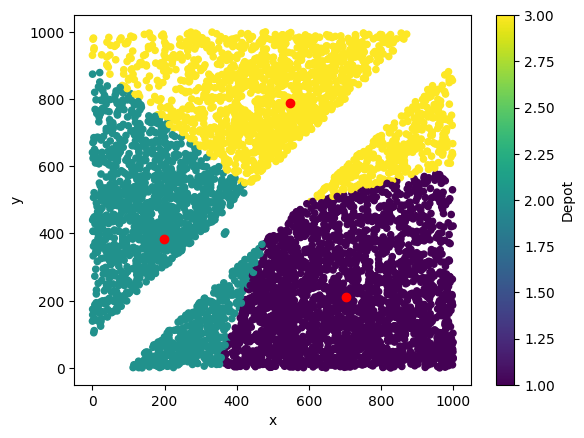

In [91]:
df.plot.scatter(x='x', y='y', c='Depot', cmap='viridis')
for index, cluster in enumerate(cluster_locations):
    plt.scatter(cluster[0], cluster[1], color='red')

Recommended locations for cluster centers:
 [[803.24145861 151.14641168]
 [806.84590142 530.53930161]
 [162.30229393 498.91279387]
 [436.20922719 148.1666192 ]
 [490.5513519  826.17771215]]


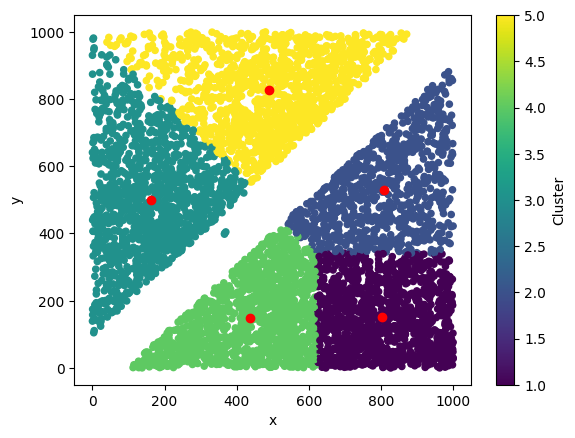

In [93]:
# Kyynärpään perusteella 5 depottia
clusters = 5
df = pd.read_csv('data/drone_cust_locations.csv', sep=';')
model = KMeans(init='random', n_clusters=clusters, random_state=1)
dropped_data = df.drop(columns=['clientid'])
model.fit(dropped_data)
cluster_locations = model.cluster_centers_
df['Cluster'] = model.labels_ + 1
df.plot.scatter(x="x", y="y", c='Cluster', cmap="viridis")
for index, cluster in enumerate(cluster_locations):
    plt.scatter(cluster[0], cluster[1], color='red')
print(f'Recommended locations for cluster centers:\n {cluster_locations}')

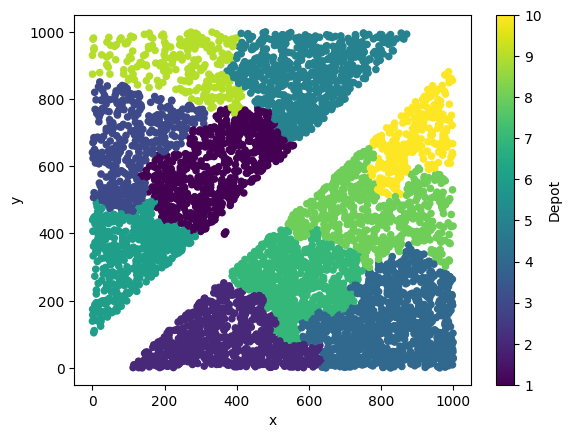

In [94]:
# Discuss the differences in this context.
# KMeans:in klusterit ovat symmetrisempiä kokoavan hierarkisen klusteroinnin klustereihin verrattuna
clusters = 10
model = AgglomerativeClustering(n_clusters=clusters)
model.fit(dropped_data)
df['Depot'] = model.labels_ + 1
df.plot.scatter(x="x", y="y", c='Depot', cmap="viridis");